In [33]:
!pip install yfinance
!pip install scikit-learn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.0/11.0 MB 2.9 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 301.8/301.8 kB 2.4 MB/s eta 0:00:00a 0:00:01


In [68]:
import yfinance as yf
import pandas as pd
import os

In [69]:
if os.path.exists("sp500.csv"):
    sp500 = pd.read_csv("sp500.csv", index_col=0)
else:
    sp500 = yf.Ticker("^GSPC")
    sp500 = sp500.history(period="max")
    sp500.to_csv("sp500.csv")

In [70]:
sp500.index = pd.to_datetime(sp500.index)

In [71]:
sp500

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1927-12-30 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,0.0,0.0
1928-01-03 00:00:00-05:00,17.760000,17.760000,17.760000,17.760000,0,0.0,0.0
1928-01-04 00:00:00-05:00,17.719999,17.719999,17.719999,17.719999,0,0.0,0.0
1928-01-05 00:00:00-05:00,17.549999,17.549999,17.549999,17.549999,0,0.0,0.0
1928-01-06 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,0.0,0.0
...,...,...,...,...,...,...,...
2024-07-12 00:00:00-04:00,5590.759766,5655.560059,5590.439941,5615.350098,3700280000,0.0,0.0
2024-07-15 00:00:00-04:00,5638.160156,5666.939941,5614.750000,5631.220215,3620470000,0.0,0.0
2024-07-16 00:00:00-04:00,5644.089844,5669.669922,5639.020020,5667.200195,4041760000,0.0,0.0


In [7]:
sp500.index

DatetimeIndex(['1927-12-30 00:00:00-05:00', '1928-01-03 00:00:00-05:00',
               '1928-01-04 00:00:00-05:00', '1928-01-05 00:00:00-05:00',
               '1928-01-06 00:00:00-05:00', '1928-01-09 00:00:00-05:00',
               '1928-01-10 00:00:00-05:00', '1928-01-11 00:00:00-05:00',
               '1928-01-12 00:00:00-05:00', '1928-01-13 00:00:00-05:00',
               ...
               '2024-07-05 00:00:00-04:00', '2024-07-08 00:00:00-04:00',
               '2024-07-09 00:00:00-04:00', '2024-07-10 00:00:00-04:00',
               '2024-07-11 00:00:00-04:00', '2024-07-12 00:00:00-04:00',
               '2024-07-15 00:00:00-04:00', '2024-07-16 00:00:00-04:00',
               '2024-07-17 00:00:00-04:00', '2024-07-18 00:00:00-04:00'],
              dtype='datetime64[ns, America/New_York]', name='Date', length=24252, freq=None)

<Axes: xlabel='Date'>

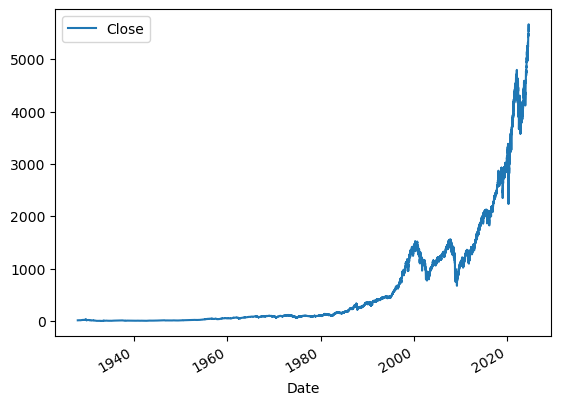

In [72]:
sp500.plot(y="Close", use_index=True) 

In [73]:
del sp500["Dividends"]
del sp500["Stock Splits"]


In [74]:
sp500["Tomorrow"] = sp500["Close"].shift(-1)

In [75]:
sp500

,Open,High,Low,Close,Volume,Tomorrow
Date,,,,,,
1927-12-30 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,17.760000
1928-01-03 00:00:00-05:00,17.760000,17.760000,17.760000,17.760000,0,17.719999
1928-01-04 00:00:00-05:00,17.719999,17.719999,17.719999,17.719999,0,17.549999
1928-01-05 00:00:00-05:00,17.549999,17.549999,17.549999,17.549999,0,17.660000
1928-01-06 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,17.500000
...,...,...,...,...,...,...
2024-07-12 00:00:00-04:00,5590.759766,5655.560059,5590.439941,5615.350098,3700280000,5631.220215
2024-07-15 00:00:00-04:00,5638.160156,5666.939941,5614.750000,5631.220215,3620470000,5667.200195
2024-07-16 00:00:00-04:00,5644.089844,5669.669922,5639.020020,5667.200195,4041760000,5588.270020


In [76]:
sp500["Target"] = (sp500["Tomorrow"] > sp500["Close"]).astype(int)

In [77]:
sp500

,Open,High,Low,Close,Volume,Tomorrow,Target
Date,,,,,,,
1927-12-30 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,17.760000,1
1928-01-03 00:00:00-05:00,17.760000,17.760000,17.760000,17.760000,0,17.719999,0
1928-01-04 00:00:00-05:00,17.719999,17.719999,17.719999,17.719999,0,17.549999,0
1928-01-05 00:00:00-05:00,17.549999,17.549999,17.549999,17.549999,0,17.660000,1
1928-01-06 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,17.500000,0
...,...,...,...,...,...,...,...
2024-07-12 00:00:00-04:00,5590.759766,5655.560059,5590.439941,5615.350098,3700280000,5631.220215,1
2024-07-15 00:00:00-04:00,5638.160156,5666.939941,5614.750000,5631.220215,3620470000,5667.200195,1
2024-07-16 00:00:00-04:00,5644.089844,5669.669922,5639.020020,5667.200195,4041760000,5588.270020,0


In [78]:
sp500 = sp500.loc["1990-01-01":].copy()

In [79]:
sp500

,Open,High,Low,Close,Volume,Tomorrow,Target
Date,,,,,,,
1990-01-02 00:00:00-05:00,353.399994,359.690002,351.980011,359.690002,162070000,358.760010,0
1990-01-03 00:00:00-05:00,359.690002,360.589996,357.890015,358.760010,192330000,355.670013,0
1990-01-04 00:00:00-05:00,358.760010,358.760010,352.890015,355.670013,177000000,352.200012,0
1990-01-05 00:00:00-05:00,355.670013,355.670013,351.350006,352.200012,158530000,353.790009,1
1990-01-08 00:00:00-05:00,352.200012,354.239990,350.540009,353.790009,140110000,349.619995,0
...,...,...,...,...,...,...,...
2024-07-12 00:00:00-04:00,5590.759766,5655.560059,5590.439941,5615.350098,3700280000,5631.220215,1
2024-07-15 00:00:00-04:00,5638.160156,5666.939941,5614.750000,5631.220215,3620470000,5667.200195,1
2024-07-16 00:00:00-04:00,5644.089844,5669.669922,5639.020020,5667.200195,4041760000,5588.270020,0


In [90]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=100, min_samples_split=100, random_state=1)

train = sp500.iloc[:-100]
test = sp500.iloc[-100:]

predictors = ["Close", "Volume", "Open", "High", "Low"]
model.fit(train[predictors], train["Target"])

RandomForestClassifier(min_samples_split=100, random_state=1)

In [91]:
from sklearn.metrics import precision_score

preds = model.predict(test[predictors])
preds = pd.Series(preds, index=test.index)
precision_score(test["Target"], preds)

1.0

<Axes: xlabel='Date'>

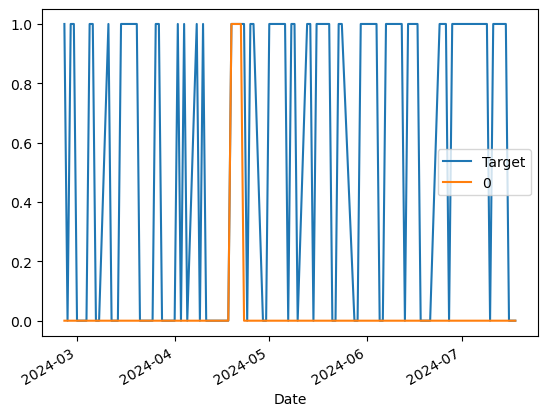

In [92]:
combined = pd.concat([test["Target"], preds], axis=1)
combined.plot()

In [93]:
def predict(train, test, predictors, model):
    model.fit(train[predictors], train["Target"])
    preds = model.predict(test[predictors])
    preds = pd.Series(preds, index=test.index, name="Predictions")
    combined = pd.concat([test["Target"], preds], axis=1)
    return combined

In [94]:
def backtest(data, model, predictors, start=2500, step=250):
    all_predictions = []

    for i in range(start, data.shape[0], step):
        train = data.iloc[0:i].copy()
        test = data.iloc[i:(i+step)].copy()
        predictions = predict(train, test, predictors, model)
        all_predictions.append(predictions)
    
    return pd.concat(all_predictions)


In [99]:
horizons = [2,5,60,250,1000]
new_predictors = []

for horizon in horizons:
    rolling_averages = sp500.rolling(horizon).mean()
    
    ratio_column = f"Close_Ratio_{horizon}"
    sp500[ratio_column] = sp500["Close"] / rolling_averages["Close"]
    
    trend_column = f"Trend_{horizon}"
    sp500[trend_column] = sp500.shift(1).rolling(horizon).sum()["Target"]
    
    new_predictors+= [ratio_column, trend_column]

In [100]:
sp500 = sp500.dropna(subset=sp500.columns[sp500.columns != "Tomorrow"])

In [101]:
sp500

,Open,High,Low,Close,Volume,Tomorrow,Target,Close_Ratio_2,Trend_2,Close_Ratio_5,Trend_5,Close_Ratio_60,Trend_60,Close_Ratio_250,Trend_250,Close_Ratio_1000,Trend_1000
Date,,,,,,,,,,,,,,,,,
1993-12-14 00:00:00-05:00,465.730011,466.119995,462.459991,463.059998,275050000,461.839996,0,0.997157,1.0,0.996617,1.0,1.000283,32.0,1.028047,127.0,1.176082,512.0
1993-12-15 00:00:00-05:00,463.059998,463.690002,461.839996,461.839996,331770000,463.339996,1,0.998681,0.0,0.995899,1.0,0.997329,32.0,1.025151,126.0,1.172676,512.0
1993-12-16 00:00:00-05:00,461.859985,463.980011,461.859985,463.339996,284620000,466.380005,1,1.001621,1.0,0.999495,2.0,1.000311,32.0,1.028274,127.0,1.176163,513.0
1993-12-17 00:00:00-05:00,463.339996,466.380005,463.339996,466.380005,363750000,465.850006,0,1.003270,2.0,1.004991,3.0,1.006561,32.0,1.034781,128.0,1.183537,514.0
1993-12-20 00:00:00-05:00,466.380005,466.899994,465.529999,465.850006,255900000,465.299988,0,0.999431,1.0,1.003784,2.0,1.005120,32.0,1.033359,128.0,1.181856,513.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-07-12 00:00:00-04:00,5590.759766,5655.560059,5590.439941,5615.350098,3700280000,5631.220215,1,1.002751,1.0,1.003328,4.0,1.057544,39.0,1.162832,143.0,1.319068,531.0
2024-07-15 00:00:00-04:00,5638.160156,5666.939941,5614.750000,5631.220215,3620470000,5667.200195,1,1.001411,2.0,1.004069,4.0,1.058509,40.0,1.165049,143.0,1.322065,531.0
2024-07-16 00:00:00-04:00,5644.089844,5669.669922,5639.020020,5667.200195,4041760000,5588.270020,0,1.003185,2.0,1.007244,4.0,1.063088,41.0,1.171415,143.0,1.329753,532.0


In [102]:
model = RandomForestClassifier(n_estimators=200, min_samples_split=50, random_state=1)

In [103]:
def predict(train, test, predictors, model):
    model.fit(train[predictors], train["Target"])
    preds = model.predict_proba(test[predictors])[:,1]
    preds[preds >=.6] = 1
    preds[preds <.6] = 0
    preds = pd.Series(preds, index=test.index, name="Predictions")
    combined = pd.concat([test["Target"], preds], axis=1)
    return combined


In [104]:
predictions = backtest(sp500, model, new_predictors)

In [105]:
predictions["Predictions"].value_counts()

Predictions
0.0    4366
1.0     836
Name: count, dtype: int64

In [106]:
precision_score(predictions["Target"], predictions["Predictions"])

0.5753588516746412

In [107]:
predictions["Target"].value_counts() / predictions.shape[0]

Target
1    0.545175
0    0.454825
Name: count, dtype: float64

In [108]:
predictions

,Target,Predictions
Date,,
2003-11-14 00:00:00-05:00,0,0.0
2003-11-17 00:00:00-05:00,0,1.0
2003-11-18 00:00:00-05:00,1,1.0
2003-11-19 00:00:00-05:00,0,0.0
2003-11-20 00:00:00-05:00,1,1.0
...,...,...
2024-07-12 00:00:00-04:00,1,0.0
2024-07-15 00:00:00-04:00,1,0.0
2024-07-16 00:00:00-04:00,0,0.0
